In [1]:
from __future__ import print_function
import glob
import matplotlib
# rc_fonts = {
#     "font.weight": 800,
#     "font.family": "serif",
#     "font.serif": ["Times"], # use latex's default
#     "font.sans-serif": ["DejaVu Sans"],
#     "text.usetex": True,
# }
# matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize
import pickle
import seaborn as sns

==============app: lego=============


<IPython.core.display.Javascript object>


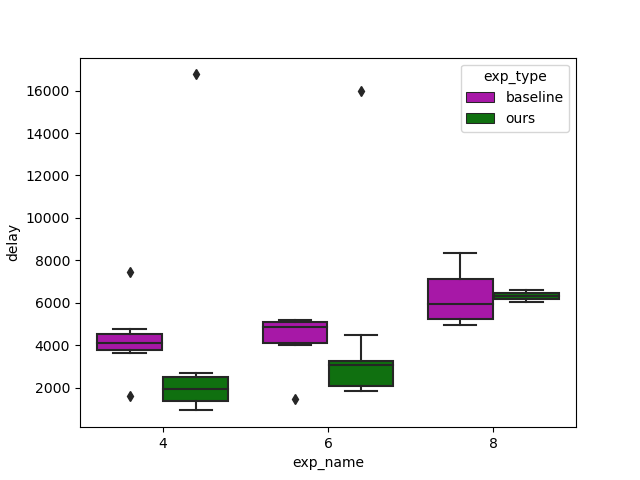

==============app: pingpong=============


<IPython.core.display.Javascript object>


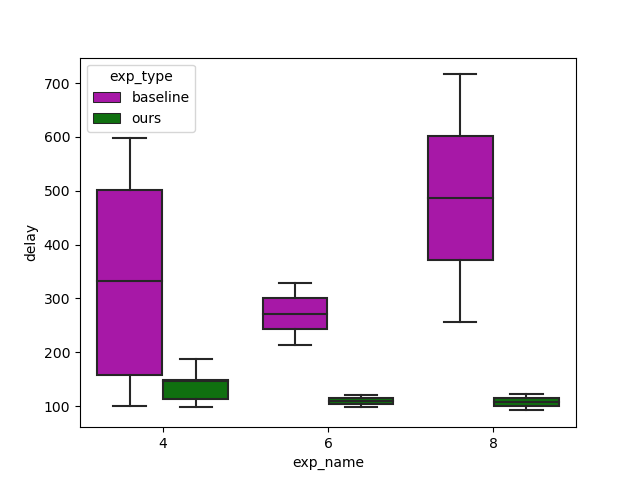

==============app: pool=============


<IPython.core.display.Javascript object>


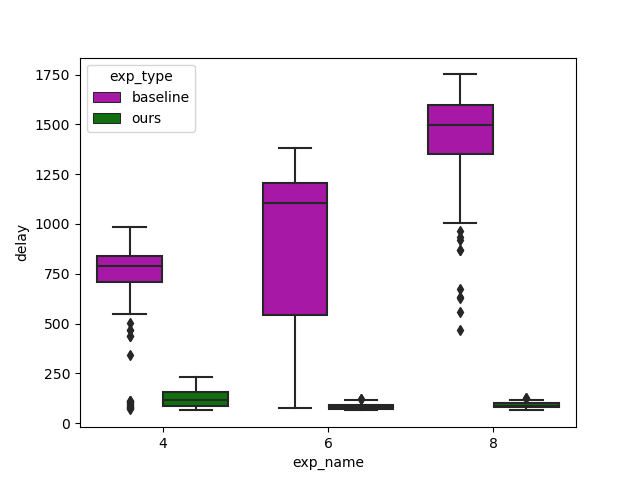

==============app: face=============


<IPython.core.display.Javascript object>


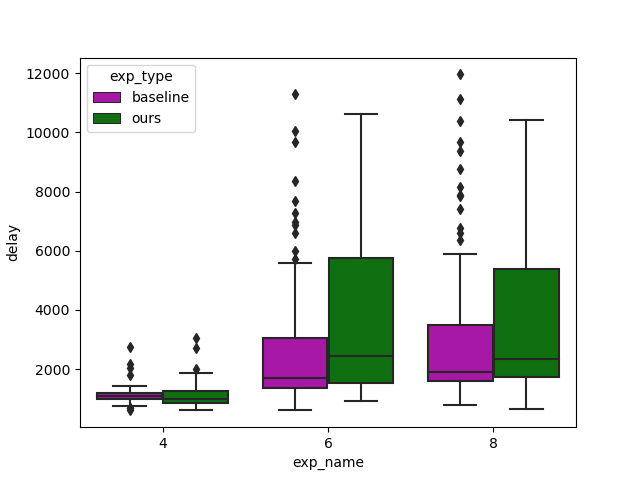

In [4]:
%matplotlib notebook
with open('sec6-inst-latency.pkl', 'rb') as f:
    data = pickle.load(f)
apps = ['lego', 'pingpong', 'pool', 'face']
exps = [4, 6, 8]

for app in apps:
    print('==============app: {}============='.format(app))
    app_data = data[app]
    df = pd.DataFrame()
    cols = ['delay', 'exp_type', 'exp_name']
    plt.figure()
    for exp in exps:
        bn = 'sec6-baseline-{}'.format(exp)
        on = 'sec6-ours-{}'.format(exp)
        baseline_data = app_data[bn]
        ours_data = app_data[on]
        bdf = pd.DataFrame(zip(baseline_data, ['baseline']*len(baseline_data), [exp] *len(baseline_data)), columns=cols)
        odf = pd.DataFrame(zip(ours_data, ['ours']*len(baseline_data),  [exp] *len(baseline_data)), columns =cols)
        df = df.append(bdf)
        df = df.append(odf)
    sns.boxplot(x="exp_name", y="delay",
            hue="exp_type", data=df, palette=["m", "g"])